In [1]:
import pandas as pd
import pandas as pd
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
dataset = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Read the dataset into a Pandas DataFrame
TITANIC = pd.read_csv(dataset)

In [3]:
import sys
sys.path.append('..')
from xDL.models.NATT import NATT

In [4]:
model = NATT(
    "survived ~  -1 + MLP(fare) +  MLP(age) + Transformer(sex):Transformer(deck)", 
    data=TITANIC, 
    feature_dropout=0.0001,
    binning_task="regression"
    )

--- Preprocessing ---


5it [00:00,  8.08it/s]
4it [00:00, ?it/s]

------------- Network architecture --------------
Transformer -> (ListWrapper(['sex', 'deck']), dims=32, depth=4, heads=8) -> MLP(input_dim=64) -> output dimension=1
fare -> MLP(feature=fare, n_params=12736) -> output dimension=1
age -> MLP(feature=age, n_params=12736) -> output dimension=1


In [5]:
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer = optimizer,
    loss = {"output": tf.keras.losses.BinaryCrossentropy(), "importances": None, "att_weights": None},
    metrics= {"output": [tf.keras.metrics.AUC(name="PR AUC", curve='PR'), tf.keras.metrics.AUC(name="auc")], "importances": None, "att_weights": None},)

history = model.fit(
    model.training_dataset, 
    epochs=20, 
    validation_data=model.validation_dataset,
    verbose=1
)

Epoch 1/20
1/1 [==============================] - 9s 9s/step - loss: 3.6634 - output_loss: 3.6634 - output_PR AUC: 0.3903 - output_auc: 0.4939 - val_loss: 2.3344 - val_output_loss: 2.3344 - val_output_PR AUC: 0.4412 - val_output_auc: 0.6381
Epoch 2/20
1/1 [==============================] - 0s 133ms/step - loss: 3.1283 - output_loss: 3.1283 - output_PR AUC: 0.4474 - output_auc: 0.5369 - val_loss: 1.6026 - val_output_loss: 1.6026 - val_output_PR AUC: 0.4962 - val_output_auc: 0.6451
Epoch 3/20
1/1 [==============================] - 0s 132ms/step - loss: 2.5984 - output_loss: 2.5984 - output_PR AUC: 0.4291 - output_auc: 0.5187 - val_loss: 0.9993 - val_output_loss: 0.9993 - val_output_PR AUC: 0.5132 - val_output_auc: 0.6084
Epoch 4/20
1/1 [==============================] - 0s 137ms/step - loss: 2.1025 - output_loss: 2.1025 - output_PR AUC: 0.4421 - output_auc: 0.5375 - val_loss: 0.9951 - val_output_loss: 0.9951 - val_output_PR AUC: 0.5195 - val_output_auc: 0.5921
Epoch 5/20
1/1 [===========

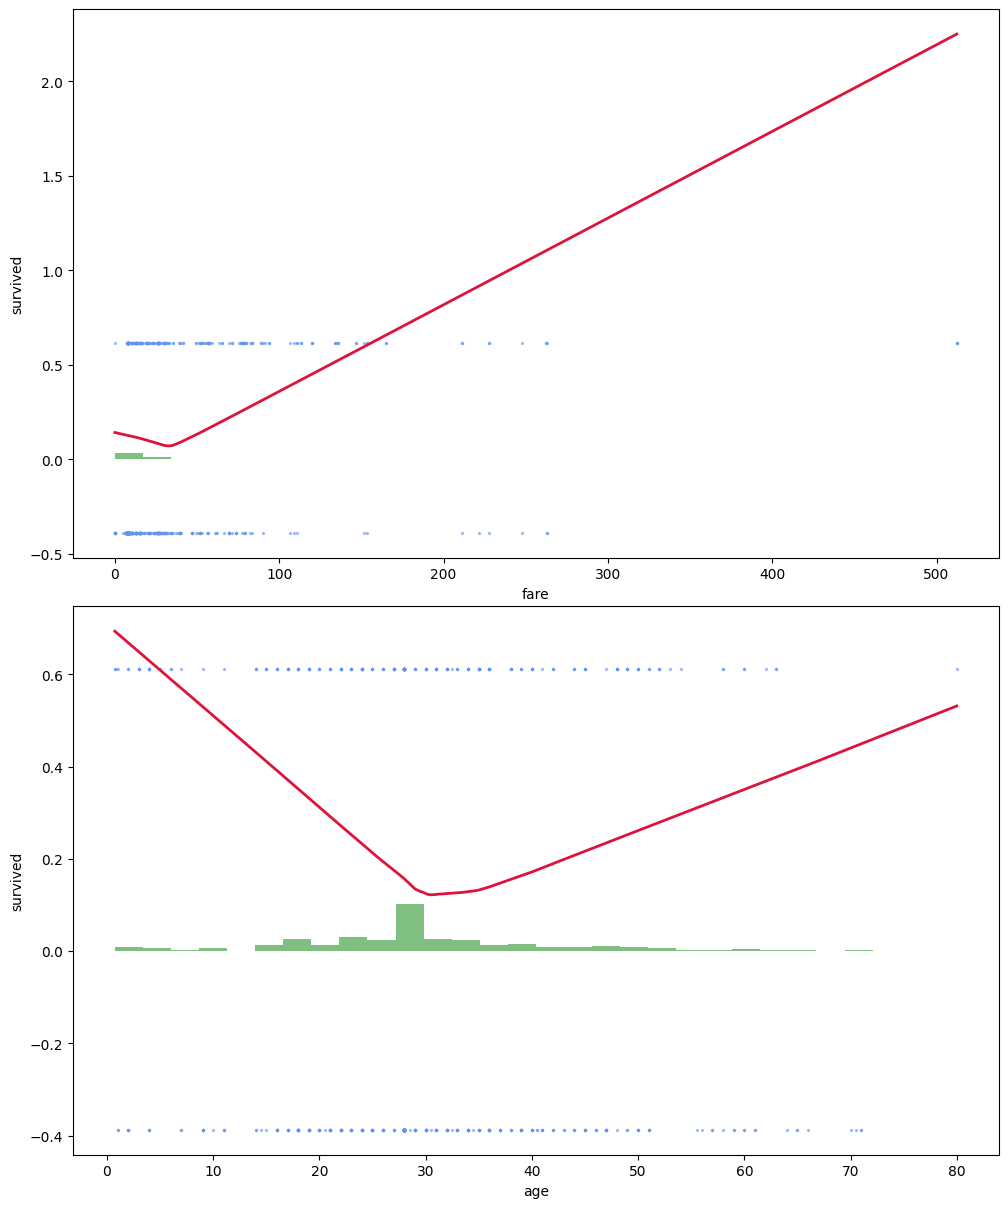

In [6]:
model.plot()

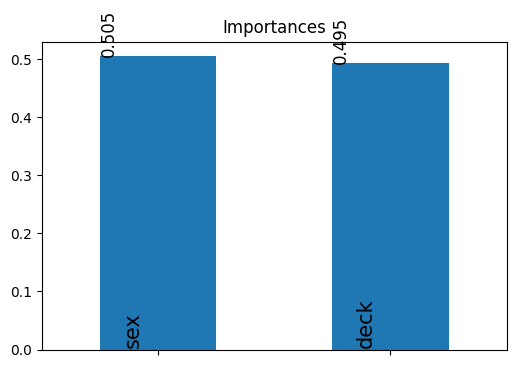

In [7]:
model.plot_importances()

--- Preprocessing ---


0it [00:00, ?it/s]

5it [00:00, 10.33it/s]


<Figure size 1200x400 with 0 Axes>

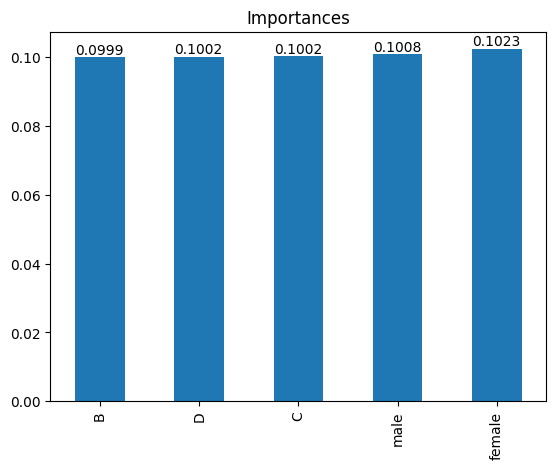

In [8]:
model.plot_categorical_importances()

--- Preprocessing ---


0it [00:00, ?it/s]

5it [00:00,  9.57it/s]


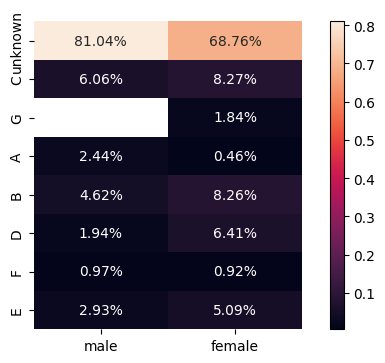

In [9]:
model.plot_heatmap_importances("sex", "deck")

--- Preprocessing ---


5it [00:00, 10.37it/s]


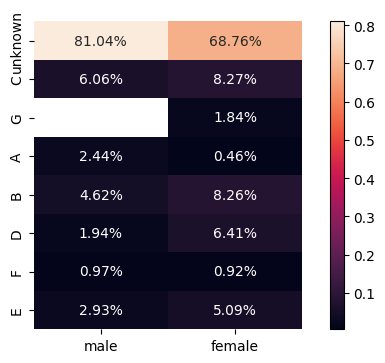

In [10]:
model.plot_heatmap_importances("sex", "deck")

# test continuous feature interactions

In [11]:
model = NATT(
    "survived ~  -1 + MLP(fare):MLP(age) + Transformer(sex):Transformer(deck):Transformer(embark_town)",
    data=TITANIC, 
    feature_dropout=0.0001)

--- Preprocessing ---


0it [00:00, ?it/s]

6it [00:00, 10.06it/s]
5it [00:00, ?it/s]


------------- Network architecture --------------
Transformer -> (ListWrapper(['sex', 'deck', 'embark_town']), dims=32, depth=4, heads=8) -> MLP(input_dim=96) -> output dimension=1
fare_._age -> MLP(feature=fare_._age, n_params=12864) -> output dimension=1


In [12]:
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer = optimizer,
    loss = {"output": tf.keras.losses.BinaryCrossentropy(), "importances": None, "att_weights": None},
    metrics= {"output": [tf.keras.metrics.AUC(name="PR AUC", curve='PR'), "accuracy"], "importances": None, "att_weights": None},)

history = model.fit(
    model.training_dataset, 
    epochs=30, 
    validation_data=model.validation_dataset,
    verbose=1
)

Epoch 1/30


1/1 [==============================] - 9s 9s/step - loss: 5.1471 - output_loss: 5.1471 - output_PR AUC: 0.3972 - output_accuracy: 0.6036 - val_loss: 5.8467 - val_output_loss: 5.8467 - val_output_PR AUC: 0.3840 - val_output_accuracy: 0.6160
Epoch 2/30
1/1 [==============================] - 0s 145ms/step - loss: 4.4308 - output_loss: 4.4308 - output_PR AUC: 0.4305 - output_accuracy: 0.6175 - val_loss: 4.8598 - val_output_loss: 4.8598 - val_output_PR AUC: 0.3200 - val_output_accuracy: 0.6800
Epoch 3/30
1/1 [==============================] - 0s 143ms/step - loss: 4.5728 - output_loss: 4.5728 - output_PR AUC: 0.4084 - output_accuracy: 0.6076 - val_loss: 4.8524 - val_output_loss: 4.8524 - val_output_PR AUC: 0.3947 - val_output_accuracy: 0.6000
Epoch 4/30
1/1 [==============================] - 0s 149ms/step - loss: 4.1112 - output_loss: 4.1112 - output_PR AUC: 0.3473 - output_accuracy: 0.6295 - val_loss: 3.5438 - val_output_loss: 3.5438 - val_output_PR AUC: 0.3655 - val_output_accuracy: 0.616

In [13]:
model.feature_nets

ListWrapper([<keras.src.engine.functional.Functional object at 0x00000280780B3550>])

100/100 [==============================] - 0s 938us/step


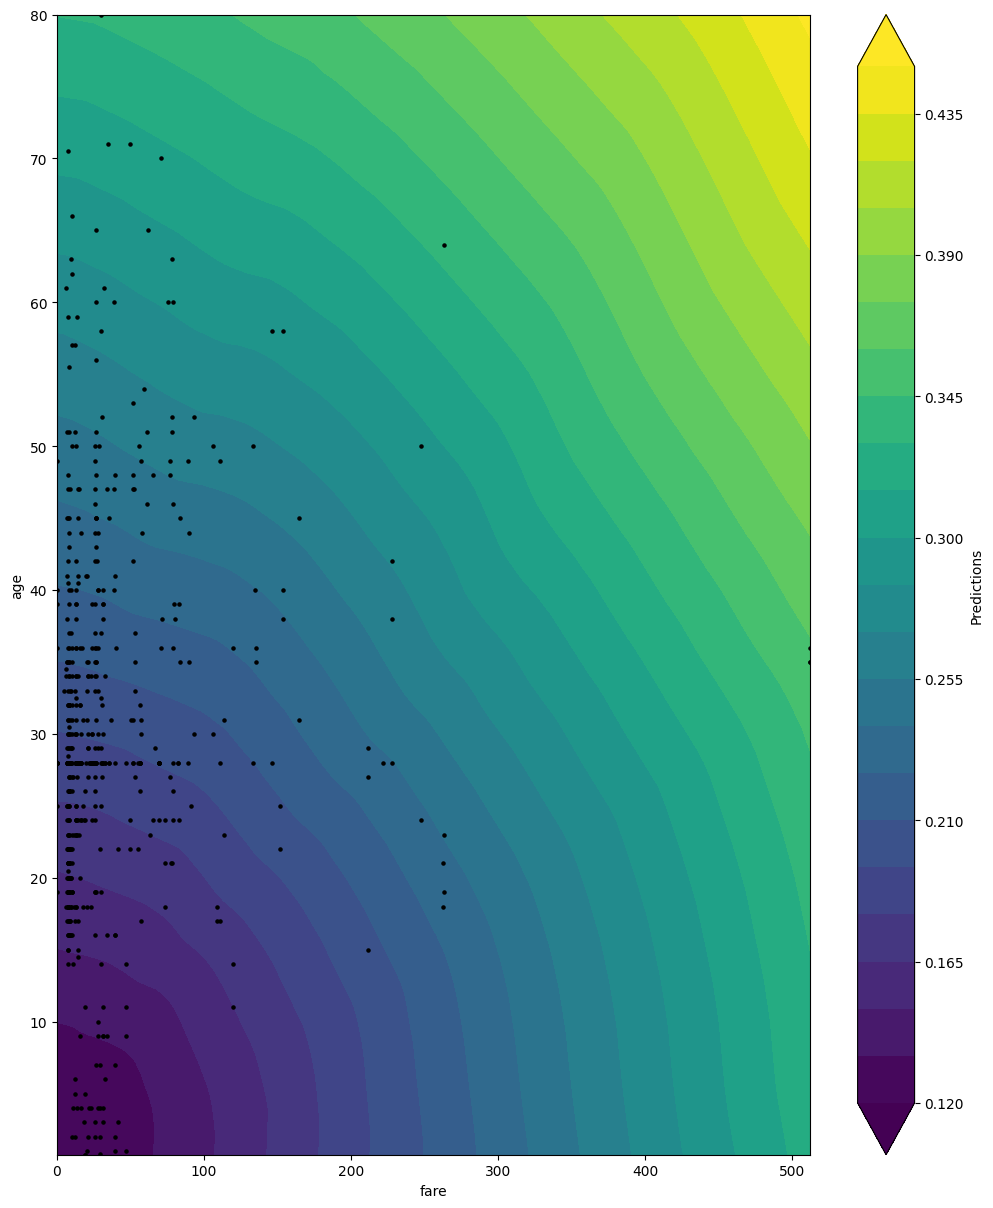

In [14]:
model.plot()